<a href="https://colab.research.google.com/github/DanielFMiller/AlgoRiskMgmt/blob/master/O'Reilly_Class_Algorithmic_Risk_Management_Capital_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Code in this notebook is based on Chapter 13, "Python for Finance, 2nd Edition" by Yves Hilpisch***

In [0]:
import scipy.stats as scs
import numpy as np
import numpy.random as npr
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime

# Modern Portfolio Theory Tools

In [0]:
start = datetime(2017, 7, 16)
end = datetime(2019, 8, 22)
symbols = ['AAPL', 'MSFT', 'SPY', 'GLD']
data = pdr.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  4 of 4 downloaded


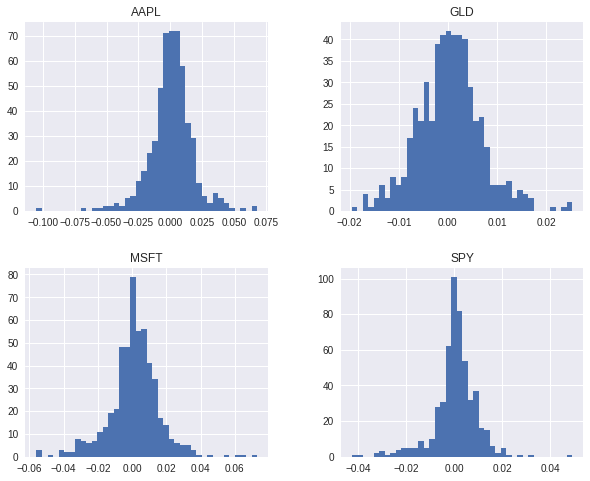

In [0]:
rets = np.log(data['Adj Close']/data['Adj Close'].shift(1))
rets.hist(bins=40, figsize = (10, 8));

In [0]:
rets.mean()* 252

AAPL    0.184336
GLD     0.090436
MSFT    0.322869
SPY     0.101653
dtype: float64

In [0]:
rets.cov() * 252

,AAPL,GLD,MSFT,SPY
AAPL,0.072847,-0.002867,0.042522,0.027864
GLD,-0.002867,0.010767,-0.001641,-0.001471
MSFT,0.042522,-0.001641,0.057983,0.028630
SPY,0.027864,-0.001471,0.028630,0.020475


In [0]:
noa = len(symbols)
weights = npr.random(noa)
weights /= np.sum(weights)
print(weights)
weights.sum()

[0.27433413 0.00261547 0.35053929 0.37251111]


1.0

In [0]:
np.sum(rets.mean() * weights) *252
variance = np.dot(weights.T, np.dot(rets.cov()*252, weights))
np.sqrt(variance)

# Kelly Criterion

In [0]:
np.random.seed(101)
p = 0.55
f = p - (1-p)
I = 50
n = 1000

def run_simulation (f):
  c = np.zeros((n, I))
  c[0] = 100
  for i in range(I):
      for t in range(1, n):
        o = np.random.binomial(1, p)
        if o > 0:
          c[t, i] = (1 + f) * c[t-1, i]
        else:
          c[t, i] = (1 - f) * c[t-1, i]
  return c
   

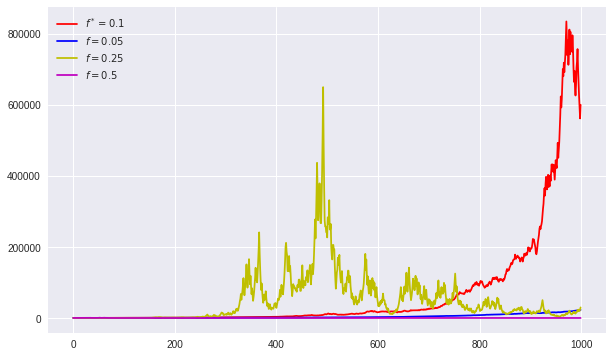

In [0]:
c_1 = run_simulation(f)
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.5)

plt.figure(figsize=(10, 6))         
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')         
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')         
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')         
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')         
plt.legend(loc=0);